# Plot All Combinations

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import xarray as xr
import rasterio
import rioxarray 
import hvplot.xarray 
from rasterio.warp import reproject, Resampling
from matplotlib_scalebar.scalebar import ScaleBar
from scipy import stats
from shapely.geometry import mapping

In [2]:
# set temperature threshold. choices: [0,1,2]
threshold_0 = 0
threshold_1 = 1
threshold_2 = 2
# set day. choices: ['20160329','20160208']
day_str_1 = '20160329'
day_str_2 = '20160208'
day_num_1 = 180
day_num_2 = 130
# set stat. choices: [0,1,2,3,4] represent ensemble [mean,std,median,25%,75%]
stat = 2

In [3]:
#open model run netcdf
xds_0 = xr.open_dataset(f"../SnowHydro/data/Model_Output/{threshold_0}K_Threshold/N47_0W124_0_agg_16_SWE_SCA_POST_WY2015_16.nc")
xds_1 = xr.open_dataset(f"../SnowHydro/data/Model_Output/{threshold_1}K_Threshold/N47_0W124_0_agg_16_SWE_SCA_POST_WY2015_16.nc")
xds_2 = xr.open_dataset(f"../SnowHydro/data/Model_Output/{threshold_2}K_Threshold/N47_0W124_0_agg_16_SWE_SCA_POST_WY2015_16.nc")

In [4]:
# select the day and stat we want from the model run, set spatial dimensions, and set crs
model_ds_t0_d1 = xds_0['SWE_Post'].sel(Day=day_num_1,Stats=stat).T
model_ds_t0_d1.rio.set_spatial_dims('Longitude','Latitude',inplace=True)
model_ds_t0_d1.rio.set_crs('EPSG:4326',inplace=True);
model_ds_t0_d2 = xds_0['SWE_Post'].sel(Day=day_num_2,Stats=stat).T
model_ds_t0_d2.rio.set_spatial_dims('Longitude','Latitude',inplace=True)
model_ds_t0_d2.rio.set_crs('EPSG:4326',inplace=True);

model_ds_t1_d1 = xds_1['SWE_Post'].sel(Day=day_num_1,Stats=stat).T
model_ds_t1_d1.rio.set_spatial_dims('Longitude','Latitude',inplace=True)
model_ds_t1_d1.rio.set_crs('EPSG:4326',inplace=True);
model_ds_t1_d2 = xds_1['SWE_Post'].sel(Day=day_num_2,Stats=stat).T
model_ds_t1_d2.rio.set_spatial_dims('Longitude','Latitude',inplace=True)
model_ds_t1_d2.rio.set_crs('EPSG:4326',inplace=True);

model_ds_t2_d1 = xds_2['SWE_Post'].sel(Day=day_num_1,Stats=stat).T
model_ds_t2_d1.rio.set_spatial_dims('Longitude','Latitude',inplace=True)
model_ds_t2_d1.rio.set_crs('EPSG:4326',inplace=True);
model_ds_t2_d2 = xds_2['SWE_Post'].sel(Day=day_num_2,Stats=stat).T
model_ds_t2_d2.rio.set_spatial_dims('Longitude','Latitude',inplace=True)
model_ds_t2_d2.rio.set_crs('EPSG:4326',inplace=True);

In [5]:
# open ASO dataset, check crs
ASO_500m_ds_d1 = xr.open_rasterio(f'data/Olympics_ASO_SWE_2016/ASO_500m_SWE_USAWOL_{day_str_1}.tif')
ASO_500m_ds_d2 = xr.open_rasterio(f'data/Olympics_ASO_SWE_2016/ASO_500m_SWE_USAWOL_{day_str_2}.tif')

In [6]:
# import glacier mask
glaciers_gdf = gpd.read_file('data/Glacier_shapefiles/glims_polygons.shp')

In [7]:
# mask glaciers and reproject
model_reproject_t0_d1 = model_ds_t0_d1.rio.clip(glaciers_gdf.geometry.apply(mapping), glaciers_gdf.crs, drop=False, all_touched=True, invert=True).rio.reproject_match(ASO_500m_ds_d1)
model_reproject_t0_d2 = model_ds_t0_d2.rio.clip(glaciers_gdf.geometry.apply(mapping), glaciers_gdf.crs, drop=False, all_touched=True, invert=True).rio.reproject_match(ASO_500m_ds_d2)

model_reproject_t1_d1 = model_ds_t1_d1.rio.clip(glaciers_gdf.geometry.apply(mapping), glaciers_gdf.crs, drop=False, all_touched=True, invert=True).rio.reproject_match(ASO_500m_ds_d1)
model_reproject_t1_d2 = model_ds_t1_d2.rio.clip(glaciers_gdf.geometry.apply(mapping), glaciers_gdf.crs, drop=False, all_touched=True, invert=True).rio.reproject_match(ASO_500m_ds_d2)

model_reproject_t2_d1 = model_ds_t2_d1.rio.clip(glaciers_gdf.geometry.apply(mapping), glaciers_gdf.crs, drop=False,all_touched=True, invert=True).rio.reproject_match(ASO_500m_ds_d1)
model_reproject_t2_d2 = model_ds_t2_d2.rio.clip(glaciers_gdf.geometry.apply(mapping), glaciers_gdf.crs, drop=False,all_touched=True, invert=True).rio.reproject_match(ASO_500m_ds_d2)

/srv/conda/envs/notebook/lib/python3.8/site-packages/pyproj/crs/crs.py:280: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)
/srv/conda/envs/notebook/lib/python3.8/site-packages/pyproj/crs/crs.py:280: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)


In [8]:
# store differences
difference = np.ndarray((3,2),dtype=object)
difference[0,0] = model_reproject_t0_d1 - ASO_500m_ds_d1
difference[0,1] = model_reproject_t0_d2 - ASO_500m_ds_d2

difference[1,0] = model_reproject_t1_d1 - ASO_500m_ds_d1
difference[1,1] = model_reproject_t1_d2 - ASO_500m_ds_d2

difference[2,0] = model_reproject_t2_d1 - ASO_500m_ds_d1
difference[2,1] = model_reproject_t2_d2 - ASO_500m_ds_d2

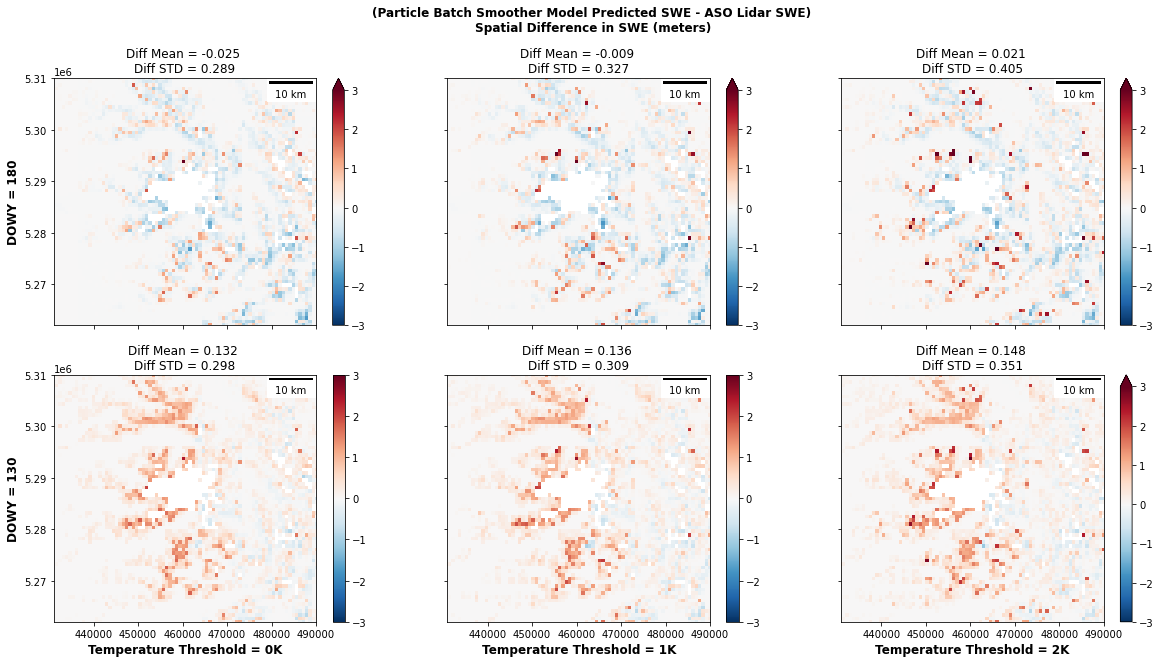

In [9]:
# plot differencing
f, ax = plt.subplots(2,3,figsize=(20,10),sharex=True,sharey=True)
f.suptitle('(Particle Batch Smoother Model Predicted SWE - ASO Lidar SWE) \nSpatial Difference in SWE (meters)',fontsize='large', fontweight='bold')
day_num = [day_num_1,day_num_2]
threshold = [threshold_0,threshold_1,threshold_2]
for c, d in enumerate(day_num):
    for r, t in enumerate(threshold):
        difference[r,c].squeeze().plot.imshow(ax=ax[c,r],vmin=-3,vmax=3,cmap='RdBu_r')
        ax[c,r].set_title(f'Diff Mean = {round(float(difference[r,c].mean()),3)} \nDiff STD = {round(float(difference[r,c].std()),3)}')
        #ax[c,r].set_title('')
        ax[c,r].set_xlim([431000, 490000])
        ax[c,r].set_ylim([5.262e6, 5.31e6])
        ax[c,r].add_artist(ScaleBar(1.0))
        ax[c,r].set(xlabel='',ylabel='')
        if c == 1:
            ax[c,r].set_xlabel(f'Temperature Threshold = {t}K',fontsize='large', fontweight='bold')
        if r == 0:
            ax[c,r].set_ylabel(f'DOWY = {d}',fontsize='large', fontweight='bold')

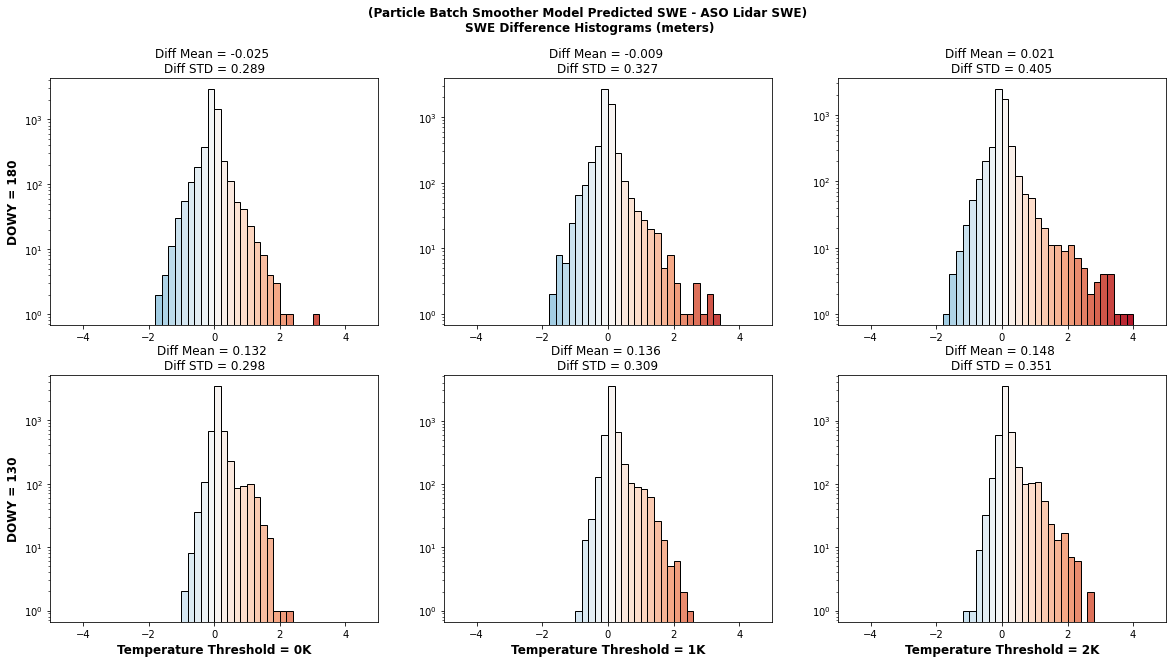

In [10]:
# plot differencing histogram
f, ax = plt.subplots(2,3,figsize=(20,10))
f.suptitle('(Particle Batch Smoother Model Predicted SWE - ASO Lidar SWE) \nSWE Difference Histograms (meters)',fontsize='large', fontweight='bold')
day_num = [day_num_1,day_num_2]
threshold = [threshold_0,threshold_1,threshold_2]

nbins = 50
colors = plt.get_cmap('RdBu_r')(np.linspace(0, 1, nbins))
    
for c, d in enumerate(day_num):
    for r, t in enumerate(threshold):
        n, bins, patches = difference[r,c].squeeze().plot.hist(ax=ax[c,r],log=True,bins=nbins,range=(-5,5),edgecolor='black')
        for patch, color in zip(patches, colors):
            patch.set_facecolor(color)
        ax[c,r].set_title(f'Diff Mean = {round(float(difference[r,c].mean()),3)} \nDiff STD = {round(float(difference[r,c].std()),3)}')
        #ax[c,r].set_title('')
        ax[c,r].set_xlim([-5, 5])
        #ax[c,r].set_ylim([5.262e6, 5.31e6])
        #ax[c,r].add_artist(ScaleBar(1.0))
        #ax[c,r].set(xlabel='',ylabel='')
        if c == 1:
            ax[c,r].set_xlabel(f'Temperature Threshold = {t}K',fontsize='large', fontweight='bold')
        if r == 0:
            ax[c,r].set_ylabel(f'DOWY = {d}',fontsize='large', fontweight='bold')

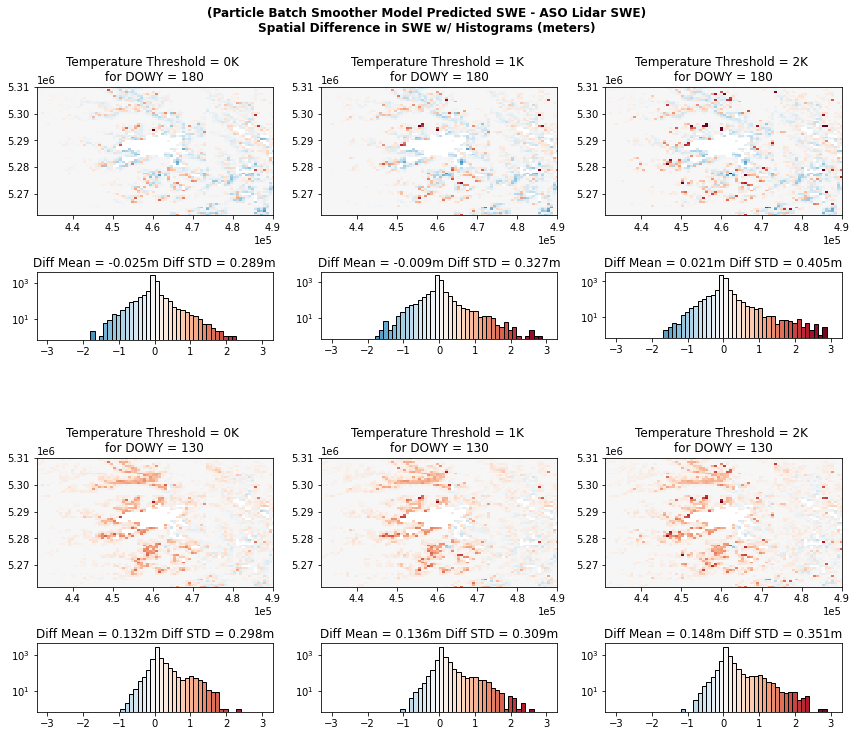

In [11]:
# plot differencing with histograms
f, ax = plt.subplots(4,3,figsize=(12,11))
f.suptitle('(Particle Batch Smoother Model Predicted SWE - ASO Lidar SWE) \nSpatial Difference in SWE w/ Histograms (meters) \n',fontsize='large', fontweight='bold')
day_num = [day_num_1,day_num_2]
threshold = [threshold_0,threshold_1,threshold_2]

nbins = 50
colors = plt.get_cmap('RdBu_r')(np.linspace(0, 1, nbins))

for c, d in enumerate(day_num):
    for r, t in enumerate(threshold):
        
        n, bins, patches = difference[r,c].squeeze().plot.hist(ax=ax[2*c+1,r],log=True,bins=nbins,range=(-3,3),edgecolor='black')
        for patch, color in zip(patches, colors):
            patch.set_facecolor(color)
            
        difference[r,c].squeeze().plot.imshow(ax=ax[2*c,r],vmin=-3,vmax=3,cmap='RdBu_r',add_colorbar=False)
        ax[2*c+1,r].set_title(f'Diff Mean = {round(float(difference[r,c].mean()),3)}m Diff STD = {round(float(difference[r,c].std()),3)}m')
        ax[2*c,r].set_title(f'Temperature Threshold = {t}K \nfor DOWY = {d}')
        ax[2*c,r].set_xlim([431000, 490000])
        ax[2*c,r].set_ylim([5.262e6, 5.31e6])
        #ax[2*c,r].add_artist(ScaleBar(1.0))
        ax[2*c,r].set(xlabel='',ylabel='')
        ax[2*c-1,r].set_anchor('N')
        ax[2*c,r].set_anchor('S')
        #ax[2*c,r].set_aspect(1)
        ax[2*c,r].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        ax[2*c-1,r].set_aspect(0.5)
plt.tight_layout()


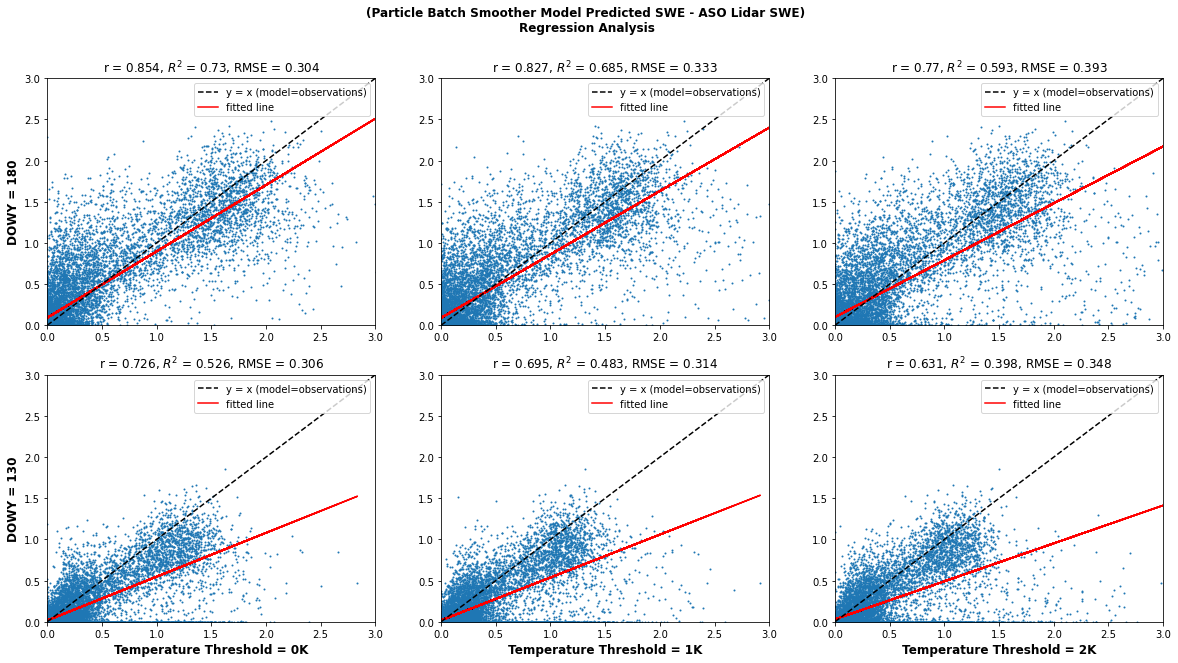

In [13]:
# scatter plots w/ regression analysis
ASO = [ASO_500m_ds_d1,ASO_500m_ds_d2]
model = np.ndarray((3,2),dtype=object)
model[0,0] = model_reproject_t0_d1
model[0,1] = model_reproject_t0_d2

model[1,0] = model_reproject_t1_d1
model[1,1] = model_reproject_t1_d2

model[2,0] = model_reproject_t2_d1
model[2,1] = model_reproject_t2_d2

x = np.linspace(0, 10, 1000)
y = x

f, ax = plt.subplots(2,3,figsize=(20,10))
f.suptitle('(Particle Batch Smoother Model Predicted SWE - ASO Lidar SWE) \nRegression Analysis',fontsize='large', fontweight='bold')
day_num = [day_num_1,day_num_2]
threshold = [threshold_0,threshold_1,threshold_2]
for c, d in enumerate(day_num):
    for r, t in enumerate(threshold):
        #difference[r,c].squeeze().plot.imshow(ax=ax[c,r],vmin=-5,vmax=5,cmap='RdBu_r')
        ax[c,r].scatter(model[r,c].squeeze(), ASO[c].squeeze(),s=1)
        res = stats.mstats.linregress(model[r,c].squeeze().to_masked_array(), ASO[c].squeeze().to_masked_array())
        a1 = ax[c,r].plot(model[r,c].squeeze().to_masked_array(), res.intercept + res.slope*model[r,c].squeeze().to_masked_array(), 'r', label='fitted line')
        a2 = ax[c,r].plot(x,y,'--k',label='y = x (perfect model and observation agreement)')
        ax[c,r].legend((a2[0], a1[0]), ('y = x (model=observations)','fitted line'), loc='upper right')
        #Slope = {round(res.slope,3)} Y-Intercept = {round(res.intercept,3)}\n 
        ax[c,r].set_title(f'r = {round(res.rvalue,3)}, $R^2$ = {round(res.rvalue**2,3)}, RMSE = {round(np.sqrt(((model[r,c].squeeze().to_masked_array() - ASO[c].squeeze().to_masked_array()) ** 2).mean()),3)}')
        #ax[c,r].set_title('')
        ax[c,r].set_xlim([0, 3])
        ax[c,r].set_ylim([0, 3])
        ax[c,r].set(xlabel='',ylabel='')
        if c == 1:
            ax[c,r].set_xlabel(f'Temperature Threshold = {t}K',fontsize='large', fontweight='bold')
        if r == 0:
            ax[c,r].set_ylabel(f'DOWY = {d}',fontsize='large', fontweight='bold')